# T20 First Innings Score Prediction

In [1]:
import pandas as pd
import numpy as np
import pickle


### Loading the dataset
df = pd.read_csv('Dataset\T20.csv')

In [2]:
df.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2005-06-13,"M Chinnaswamy Stadium, Bangalore",England,Australia,ME Trescothick,B Lee,0,0,0.1,0,0,0,0,179
1,1,2005-06-13,"M Chinnaswamy Stadium, Bangalore",England,Australia,ME Trescothick,B Lee,1,0,0.2,1,0,1,0,179
2,1,2005-06-13,"M Chinnaswamy Stadium, Bangalore",England,Australia,GO Jones,B Lee,1,0,0.3,1,0,1,0,179
3,1,2005-06-13,"M Chinnaswamy Stadium, Bangalore",England,Australia,GO Jones,B Lee,1,0,0.4,1,0,1,0,179
4,1,2005-06-13,"M Chinnaswamy Stadium, Bangalore",England,Australia,GO Jones,B Lee,1,0,0.5,1,0,1,0,179


In [3]:
# Return size of dataset
df.shape

(18518, 15)

In [4]:
# Return different datatypes for each columns(float, int, string, bool, etc.)
df.dtypes

mid                 int64
date               object
venue              object
bat_team           object
bowl_team          object
batsman            object
bowler             object
runs                int64
wickets             int64
overs             float64
runs_last_5         int64
wickets_last_5      int64
striker             int64
non-striker         int64
total               int64
dtype: object

In [5]:
# Return basic information on all columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18518 entries, 0 to 18517
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mid             18518 non-null  int64  
 1   date            18518 non-null  object 
 2   venue           18518 non-null  object 
 3   bat_team        18518 non-null  object 
 4   bowl_team       18518 non-null  object 
 5   batsman         18518 non-null  object 
 6   bowler          18518 non-null  object 
 7   runs            18518 non-null  int64  
 8   wickets         18518 non-null  int64  
 9   overs           18518 non-null  float64
 10  runs_last_5     18518 non-null  int64  
 11  wickets_last_5  18518 non-null  int64  
 12  striker         18518 non-null  int64  
 13  non-striker     18518 non-null  int64  
 14  total           18518 non-null  int64  
dtypes: float64(1), int64(8), object(6)
memory usage: 2.1+ MB


In [6]:
# Return a coloumn having null values
df.isnull().sum()

mid               0
date              0
venue             0
bat_team          0
bowl_team         0
batsman           0
bowler            0
runs              0
wickets           0
overs             0
runs_last_5       0
wickets_last_5    0
striker           0
non-striker       0
total             0
dtype: int64

In [7]:
# --- Data Cleaning ---
# Removing unwanted columns
columns_to_remove = ['mid','batsman', 'bowler', 'striker', 'non-striker']
df.drop(labels=columns_to_remove, axis=1, inplace=True)

In [8]:
df.head()

,date,venue,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,2005-06-13,"M Chinnaswamy Stadium, Bangalore",England,Australia,0,0,0.1,0,0,179
1,2005-06-13,"M Chinnaswamy Stadium, Bangalore",England,Australia,1,0,0.2,1,0,179
2,2005-06-13,"M Chinnaswamy Stadium, Bangalore",England,Australia,1,0,0.3,1,0,179
3,2005-06-13,"M Chinnaswamy Stadium, Bangalore",England,Australia,1,0,0.4,1,0,179
4,2005-06-13,"M Chinnaswamy Stadium, Bangalore",England,Australia,1,0,0.5,1,0,179


In [9]:
df['bat_team'].unique()

array(['England', 'Australia', 'South Africa', 'Sri Lanka', 'West Indies',
       'Kenya', 'Pakistan', 'India', 'New Zealand', 'Bangladesh',
       'Zimbabwe', 'Bermuda', 'Scotland', 'Ireland'], dtype=object)

In [10]:
# Keeping only consistent teams
consistent_teams = ['England', 'Australia', 'South Africa', 'Sri Lanka', 'West Indies',
                    'Kenya', 'Pakistan', 'India', 'New Zealand', 'Bangladesh', 'Zimbabwe', 'Ireland']

In [11]:
df = df[(df['bat_team'].isin(consistent_teams)) & (df['bowl_team'].isin(consistent_teams))]

In [12]:
# Removing the first 5 overs data in every match
df = df[df['overs']>=5.0]

In [13]:
df.head()

,date,venue,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
34,2005-06-13,"M Chinnaswamy Stadium, Bangalore",England,Australia,44,1,5.1,43,1,179
35,2005-06-13,"M Chinnaswamy Stadium, Bangalore",England,Australia,44,1,5.2,42,1,179
36,2005-06-13,"M Chinnaswamy Stadium, Bangalore",England,Australia,48,1,5.3,44,1,179
37,2005-06-13,"M Chinnaswamy Stadium, Bangalore",England,Australia,49,1,5.4,45,1,179
38,2005-06-13,"M Chinnaswamy Stadium, Bangalore",England,Australia,49,2,5.5,45,2,179


In [14]:
print(df['bat_team'].unique())

['England' 'Australia' 'South Africa' 'Sri Lanka' 'West Indies' 'Kenya'
 'India' 'New Zealand' 'Bangladesh' 'Pakistan' 'Zimbabwe' 'Ireland']


In [15]:
print(df['bowl_team'].unique())

['Australia' 'New Zealand' 'Pakistan' 'England' 'South Africa' 'India'
 'Zimbabwe' 'Bangladesh' 'Kenya' 'Sri Lanka' 'West Indies' 'Ireland']


In [16]:
# Converting the column 'date' from string into datetime object
from datetime import datetime
df['date'] = df['date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))

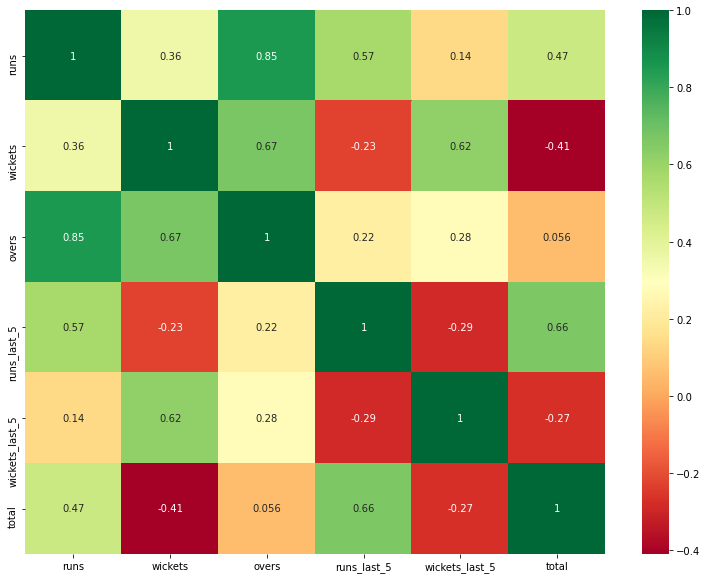

In [17]:
# Selecting correlated features using Heatmap
import matplotlib.pyplot as plt
import seaborn as sns

# Get correlation of all the features of the dataset
corr_matrix = df.corr()
top_corr_features = corr_matrix.index

# Plotting the heatmap
plt.figure(figsize=(13,10))
g = sns.heatmap(data=df[top_corr_features].corr(), annot=True, cmap='RdYlGn')

In [18]:
# --- Data Preprocessing ---
# Converting categorical features using OneHotEncoding method
encoded_df = pd.get_dummies(data=df, columns=['bat_team', 'bowl_team', 'venue'])

In [19]:
encoded_df.head()

,date,runs,wickets,overs,runs_last_5,wickets_last_5,total,bat_team_Australia,bat_team_Bangladesh,bat_team_England,...,"venue_Sardar Patel Stadium, Ahmedabad",venue_Sawai Mansingh Stadium,"venue_Sawai Mansingh Stadium, Rajasthan","venue_Shere Bangla National Stadium, Dhaka",venue_Sydney Cricket Ground (SCG),venue_Trent Bridge,"venue_Vidarbha Cricket Association Stadium, Nagpur",venue_Wankhede Stadium,"venue_Wankhede Stadium, Mumbai","venue_Zahur Ahmed Chowdhury Stadium, Chattogram"
34,2005-06-13,44,1,5.1,43,1,179,0,0,1,...,0,0,0,0,0,0,0,0,0,0
35,2005-06-13,44,1,5.2,42,1,179,0,0,1,...,0,0,0,0,0,0,0,0,0,0
36,2005-06-13,48,1,5.3,44,1,179,0,0,1,...,0,0,0,0,0,0,0,0,0,0
37,2005-06-13,49,1,5.4,45,1,179,0,0,1,...,0,0,0,0,0,0,0,0,0,0
38,2005-06-13,49,2,5.5,45,2,179,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [20]:
encoded_df.columns

Index(['date', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5',
       'total', 'bat_team_Australia', 'bat_team_Bangladesh',
       'bat_team_England', 'bat_team_India', 'bat_team_Ireland',
       'bat_team_Kenya', 'bat_team_New Zealand', 'bat_team_Pakistan',
       'bat_team_South Africa', 'bat_team_Sri Lanka', 'bat_team_West Indies',
       'bat_team_Zimbabwe', 'bowl_team_Australia', 'bowl_team_Bangladesh',
       'bowl_team_England', 'bowl_team_India', 'bowl_team_Ireland',
       'bowl_team_Kenya', 'bowl_team_New Zealand', 'bowl_team_Pakistan',
       'bowl_team_South Africa', 'bowl_team_Sri Lanka',
       'bowl_team_West Indies', 'bowl_team_Zimbabwe',
       'venue_Dr. DY Patil Sports Academy, Navi Mumbai', 'venue_Eden Gardens',
       'venue_Eden Gardens Stadium, Kolkata', 'venue_Feroz Shah Kotla',
       'venue_Feroz Shah Kotla Stadium, Delhi',
       'venue_Himachal Pradesh Cricket Association Stadium, Dharamshala',
       'venue_M Chinnaswamy Stadium', 'venue_M Chin

In [21]:
encoded_df = encoded_df[['date', 'bat_team_Australia', 'bat_team_Bangladesh', 'bat_team_England', 'bat_team_India', 'bat_team_Ireland',  'bat_team_Kenya',
                         'bat_team_New Zealand', 'bat_team_Pakistan', 'bat_team_South Africa', 'bat_team_Sri Lanka', 'bat_team_West Indies', 'bat_team_Zimbabwe', 
                         'bowl_team_Australia', 'bowl_team_Bangladesh', 'bowl_team_England', 'bowl_team_India', 'bowl_team_Ireland', 'bowl_team_Kenya',
                         'bowl_team_New Zealand', 'bowl_team_Pakistan',  'bowl_team_South Africa', 'bowl_team_Sri Lanka',  'bowl_team_West Indies', 'bowl_team_Zimbabwe',
                         'venue_Eden Gardens Stadium, Kolkata', 'venue_Feroz Shah Kotla Stadium, Delhi', 'venue_Himachal Pradesh Cricket Association Stadium, Dharamshala',
                         'venue_M Chinnaswamy Stadium, Bangalore', 'venue_M.A. Chidambaram Stadium, Chennai', 'venue_Maharashtra Cricket Association Stadium, Pune',
                         'venue_Punjab Cricket Association Stadium, Mohali',  'venue_Rajiv Gandhi International Stadium, Hyderabad',  'venue_Sardar Patel Stadium, Ahmedabad', 
                         'venue_Sawai Mansingh Stadium, Rajasthan', 'venue_Vidarbha Cricket Association Stadium, Nagpur', 'venue_Wankhede Stadium, Mumbai',
                         'venue_Melbourne Cricket Ground, Melbourne',  'venue_Shere Bangla National Stadium, Dhaka',  'venue_R. Premadasa Stadium, Colombo',
                         'overs', 'runs', 'wickets', 'runs_last_5', 'wickets_last_5', 'total']]

In [22]:
# Splitting the data into train and test set
X_train = encoded_df.drop(labels='total', axis=1)[encoded_df['date'].dt.year <= 2008]
X_test = encoded_df.drop(labels='total', axis=1)[encoded_df['date'].dt.year >= 2009]

In [23]:
y_train = encoded_df[encoded_df['date'].dt.year <= 2008]['total'].values
y_test = encoded_df[encoded_df['date'].dt.year >= 2009]['total'].values

In [24]:
# Removing the 'date' column
X_train.drop(labels='date', axis=True, inplace=True)
X_test.drop(labels='date', axis=True, inplace=True)

# Linear Regression Model

In [25]:
# --- Model Building ---
# Linear Regression Model
from sklearn.linear_model import LinearRegression
t20_regressor = LinearRegression()
t20_regressor.fit(X_train,y_train)

LinearRegression()

In [26]:
# Predicting results
y_pred_lr = t20_regressor.predict(X_test)

In [27]:
# Linear Regression - Model Evaluation
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse, accuracy_score
print("---- Linear Regression - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(y_test, y_pred_lr)))
print("Mean Squared Error (MSE): {}".format(mse(y_test, y_pred_lr)))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(y_test, y_pred_lr))))

---- Linear Regression - Model Evaluation ----
Mean Absolute Error (MAE): 18.567263423583885
Mean Squared Error (MSE): 488.4029321568408
Root Mean Squared Error (RMSE): 22.099840093467662


In [28]:
t20_regressor.score(X_train,y_train)*100

80.67921946525883

# Decision Tree Regression Model

In [29]:
# Decision Tree Regression Model
from sklearn.tree import DecisionTreeRegressor
decision_regressor = DecisionTreeRegressor()
decision_regressor.fit(X_train,y_train)

DecisionTreeRegressor()

In [30]:
# Predicting results
y_pred_dt = decision_regressor.predict(X_test)

In [31]:
# Decision Tree Regression - Model Evaluation
print("---- Decision Tree Regression - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(y_test, y_pred_dt)))
print("Mean Squared Error (MSE): {}".format(mse(y_test, y_pred_dt)))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(y_test, y_pred_dt))))

---- Decision Tree Regression - Model Evaluation ----
Mean Absolute Error (MAE): 22.538190777895107
Mean Squared Error (MSE): 983.6342837029215
Root Mean Squared Error (RMSE): 31.36294443611635


In [32]:
decision_regressor.score(X_train,y_train)*100

100.0

# Random Forest Regression Model

In [33]:
# Random Forest Regression Model
from sklearn.ensemble import RandomForestRegressor
random_regressor = RandomForestRegressor()
random_regressor.fit(X_train,y_train)

RandomForestRegressor()

In [34]:
# Predicting results
y_pred_rf = random_regressor.predict(X_test)

In [35]:
# Random Forest Regression - Model Evaluation
print("---- Random Forest Regression - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(y_test, y_pred_rf)))
print("Mean Squared Error (MSE): {}".format(mse(y_test, y_pred_rf)))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(y_test, y_pred_rf))))

---- Random Forest Regression - Model Evaluation ----
Mean Absolute Error (MAE): 16.062080253431887
Mean Squared Error (MSE): 447.5366196761704
Root Mean Squared Error (RMSE): 21.155061325275575


In [36]:
random_regressor.score(X_train,y_train)*100

99.91944503621049

# AdaBoost Model

In [37]:
# AdaBoost Model using Linear Regression as the base learner
from sklearn.ensemble import AdaBoostRegressor
adb_regressor = AdaBoostRegressor(base_estimator=t20_regressor, n_estimators=100)
adb_regressor.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=LinearRegression(), n_estimators=100)

In [38]:
# Predicting results
y_pred_adb = adb_regressor.predict(X_test)

In [39]:
# AdaBoost Regression - Model Evaluation
print("---- AdaBoost Regression - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(y_test, y_pred_adb)))
print("Mean Squared Error (MSE): {}".format(mse(y_test, y_pred_adb)))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(y_test, y_pred_adb))))

---- AdaBoost Regression - Model Evaluation ----
Mean Absolute Error (MAE): 19.852475558341546
Mean Squared Error (MSE): 578.5333773228899
Root Mean Squared Error (RMSE): 24.05272078836176


In [40]:
adb_regressor.score(X_train,y_train)*100

79.8930192343025

# PREDICTION FOR T20 MATCHES

In [41]:
def predict_score(batting_team='India', bowling_team='Pakistan', Venue='Wankhede Stadium, Mumbai', overs=6.3, runs=45, wickets=1, 
                  runs_in_prev_5=52, wickets_in_prev_5=2):
        temp_array = list()
        
        # Batting_team
        if batting_team == 'India':
            temp_array = temp_array + [1,0,0,0,0,0,0,0,0,0,0,0]
        elif batting_team == 'England':
            temp_array = temp_array + [0,1,0,0,0,0,0,0,0,0,0,0]
        elif batting_team == 'Pakistan':
            temp_array = temp_array + [0,0,1,0,0,0,0,0,0,0,0,0]
        elif batting_team == 'Sri Lanka':
            temp_array = temp_array + [0,0,0,1,0,0,0,0,0,0,0,0]
        elif batting_team == 'Australia':
            temp_array = temp_array + [0,0,0,0,1,0,0,0,0,0,0,0]
        elif batting_team == 'South Africa':
            temp_array = temp_array + [0,0,0,0,0,1,0,0,0,0,0,0]
        elif batting_team == 'New Zealand':
            temp_array = temp_array + [0,0,0,0,0,0,1,0,0,0,0,0]
        elif batting_team == 'Bangladesh':
            temp_array = temp_array + [0,0,0,0,0,0,0,1,0,0,0,0]
        elif batting_team == 'West Indies':
            temp_array = temp_array + [0,0,0,0,0,0,0,0,1,0,0,0]
        elif batting_team == 'Zimbabwe':
            temp_array = temp_array + [0,0,0,0,0,0,0,0,0,1,0,0]
        elif batting_team == 'Kenya':
            temp_array = temp_array + [0,0,0,0,0,0,0,0,0,0,1,0]    
        elif batting_team == 'Ireland':
            temp_array = temp_array + [0,0,0,0,0,0,0,0,0,0,0,1]    
                    
            
            
        # Bowling_team
        if bowling_team == 'India':
            temp_array = temp_array + [1,0,0,0,0,0,0,0,0,0,0,0]
        elif bowling_team == 'England':
            temp_array = temp_array + [0,1,0,0,0,0,0,0,0,0,0,0]
        elif bowling_team == 'Pakistan':
            temp_array = temp_array + [0,0,1,0,0,0,0,0,0,0,0,0]
        elif bowling_team == 'Sri Lanka':
            temp_array = temp_array + [0,0,0,1,0,0,0,0,0,0,0,0]
        elif bowling_team == 'Australia':
            temp_array = temp_array + [0,0,0,0,1,0,0,0,0,0,0,0]
        elif bowling_team == 'South Africa':
            temp_array = temp_array + [0,0,0,0,0,1,0,0,0,0,0,0]
        elif bowling_team == 'New Zealand':
            temp_array = temp_array + [0,0,0,0,0,0,1,0,0,0,0,0]
        elif bowling_team == 'Bangladesh':
            temp_array = temp_array + [0,0,0,0,0,0,0,1,0,0,0,0]
        elif bowling_team == 'West Indies':
            temp_array = temp_array + [0,0,0,0,0,0,0,0,1,0,0,0]
        elif bowling_team == 'Zimbabwe':
            temp_array = temp_array + [0,0,0,0,0,0,0,0,0,1,0,0]
        elif bowling_team == 'Kenya':
            temp_array = temp_array + [0,0,0,0,0,0,0,0,0,0,1,0]
        elif bowling_team == 'Ireland':
            temp_array = temp_array + [0,0,0,0,0,0,0,0,0,0,0,1]     


        # Venue
        if Venue == 'M Chinnaswamy Stadium, Bangalore':
            temp_array = temp_array + [1,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
        elif Venue == 'Punjab Cricket Association Stadium, Mohali':
            temp_array = temp_array + [0,1,0,0,0,0,0,0,0,0,0,0,0,0,0]
        elif Venue == 'Feroz Shah Kotla Stadium, Delhi':
            temp_array = temp_array + [0,0,1,0,0,0,0,0,0,0,0,0,0,0,0]
        elif Venue == 'Wankhede Stadium, Mumbai':
            temp_array = temp_array + [0,0,0,1,0,0,0,0,0,0,0,0,0,0,0]
        elif Venue == 'Eden Gardens Stadium, Kolkata':
            temp_array = temp_array + [0,0,0,0,1,0,0,0,0,0,0,0,0,0,0]
        elif Venue == 'Maharashtra Cricket Association Stadium, Pune':
            temp_array = temp_array + [0,0,0,0,0,1,0,0,0,0,0,0,0,0,0]
        elif Venue == 'Vidarbha Cricket Association Stadium, Nagpur':
            temp_array = temp_array + [0,0,0,0,0,0,1,0,0,0,0,0,0,0,0]
        elif Venue == 'Sawai Mansingh Stadium, Rajasthan':
            temp_array = temp_array + [0,0,0,0,0,0,0,1,0,0,0,0,0,0,0]
        elif Venue == 'Rajiv Gandhi International Stadium, Hyderabad':
            temp_array = temp_array + [0,0,0,0,0,0,0,0,1,0,0,0,0,0,0]
        elif Venue == 'M.A. Chidambaram Stadium, Chennai':
            temp_array = temp_array + [0,0,0,0,0,0,0,0,0,1,0,0,0,0,0]
        elif Venue == 'Himachal Pradesh Cricket Association Stadium, Dharamshala':
            temp_array = temp_array + [0,0,0,0,0,0,0,0,0,0,1,0,0,0,0]
        elif Venue == 'Sardar Patel Stadium, Ahmedabad':
            temp_array = temp_array + [0,0,0,0,0,0,0,0,0,0,0,1,0,0,0]
        elif Venue == 'Melbourne Cricket Ground, Melbourne':
            temp_array = temp_array + [0,0,0,0,0,0,0,0,0,0,0,0,1,0,0]
        elif Venue == 'Shere Bangla National Stadium, Dhaka':
            temp_array = temp_array + [0,0,0,0,0,0,0,0,0,0,0,0,0,1,0]
        elif Venue == 'R. Premadasa Stadium, Colombo':
            temp_array = temp_array + [0,0,0,0,0,0,0,0,0,0,0,0,0,0,1]    
            
            
         # Overs, Runs, Wickets, Runs_in_prev_5, Wickets_in_prev_5  
        temp_array = temp_array +[overs, runs, wickets, runs_in_prev_5, wickets_in_prev_5]
        
        # Converting into numpy array
        data = np.array([temp_array])
        
        # Prediction
        return int(t20_regressor.predict(data)[0])
        

# Prediction 1:

In [42]:
final_score = predict_score(batting_team='India', bowling_team='Australia', Venue='Feroz Shah Kotla Stadium, Delhi', 
                            overs=7.3, runs=79, wickets=2, runs_in_prev_5=35, wickets_in_prev_5=1)
print("The final predicted score (range): {} to {}".format(final_score-10, final_score+5))

The final predicted score (range): 132 to 147


# Prediction 2:

In [43]:
final_score = predict_score(batting_team='Sri Lanka', bowling_team='Bangladesh', Venue='Shere Bangla National Stadium, Dhaka', 
                            overs=5.3, runs=39, wickets=2, runs_in_prev_5=35, wickets_in_prev_5=3)
print("The final predicted score (range): {} to {}".format(final_score-10, final_score+5))

The final predicted score (range): 177 to 192


# Prediction 3:

In [44]:
final_score = predict_score(batting_team='England', bowling_team='Pakistan', Venue='Maharashtra Cricket Association Stadium, Pune', 
                            overs=10.3, runs=104, wickets=2, runs_in_prev_5=65, wickets_in_prev_5=0)
print("The final predicted score (range): {} to {}".format(final_score-10, final_score+5))

The final predicted score (range): 188 to 203


# Prediction 4:

In [45]:
final_score = predict_score(batting_team='Kenya', bowling_team='Ireland', Venue='Sardar Patel Stadium, Ahmedabad', 
                            overs=6.3, runs=34, wickets=2, runs_in_prev_5=40, wickets_in_prev_5=0)
print("The final predicted score (range): {} to {}".format(final_score-10, final_score+5))

The final predicted score (range): 136 to 151


# Prediction 5:

In [46]:
final_score = predict_score(batting_team='Australia', bowling_team='India', Venue='Melbourne Cricket Ground, Melbourne', 
                            overs=6.3, runs=62, wickets=0, runs_in_prev_5=43, wickets_in_prev_5=1)
print("The final predicted score (range): {} to {}".format(final_score-10, final_score+5))

The final predicted score (range): 127 to 142
